# **Intro**
In this notebook, i try to focus on optimizating svc model by applying GridSearch with cross_validation for hyperparameter tuning which is
a popular method for enhancement the performance.

I tried to explain some at the part of training and optimization of the model to help as much as possible to understanding the concept of optimizating at machine learning according to my knowledge.

# Import Libraries

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler


# Load the Data

In [28]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print("Dataset Information:")
print(df.info())
print("\nFirst Few Rows:")
print(df.head())

print("\nSummary Statistics:")
print(df.describe())

print("\nClass Distribution:")
print(df['target'].value_counts())




Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None

First Few Rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               

# Exploratory Data Analysi

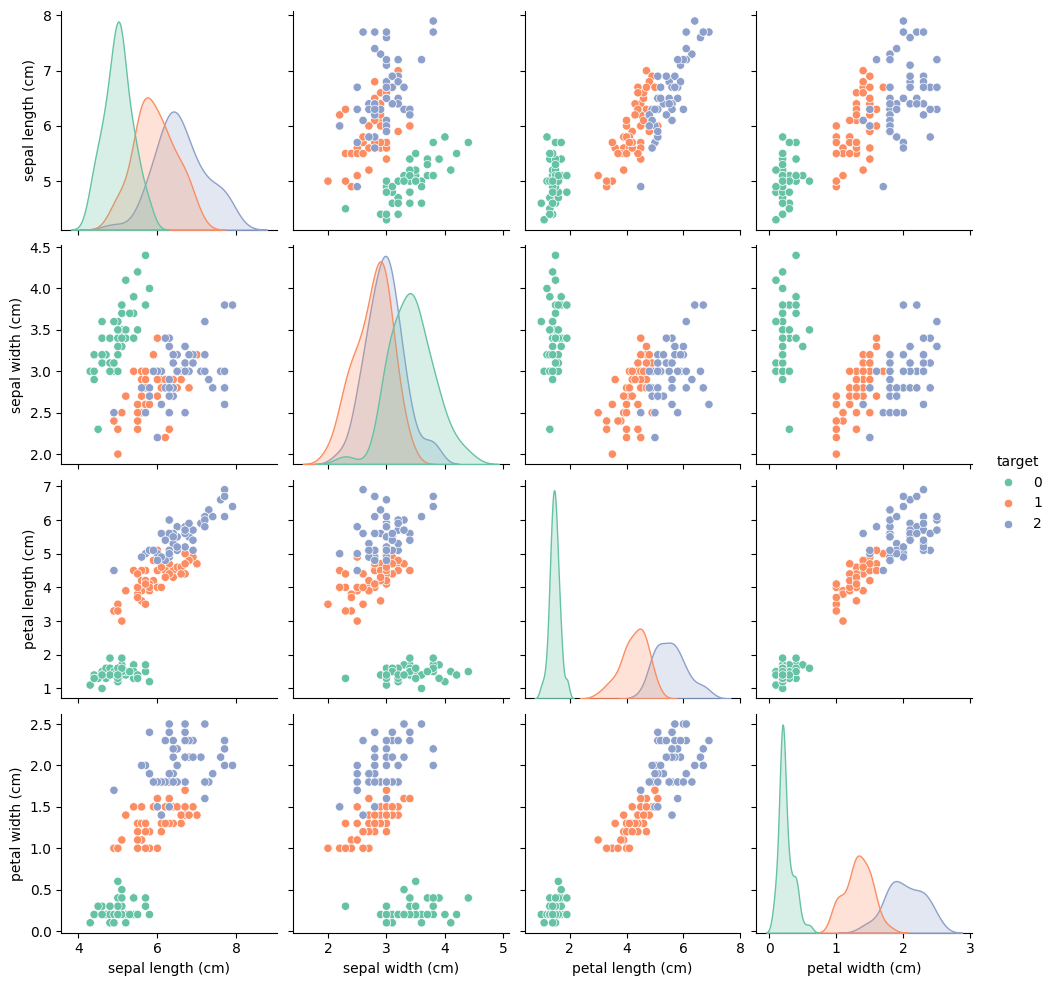

In [29]:
# Plot pairplot for visualizing data
sns.pairplot(df, hue='target', palette='Set2', diag_kind='kde')
plt.show()

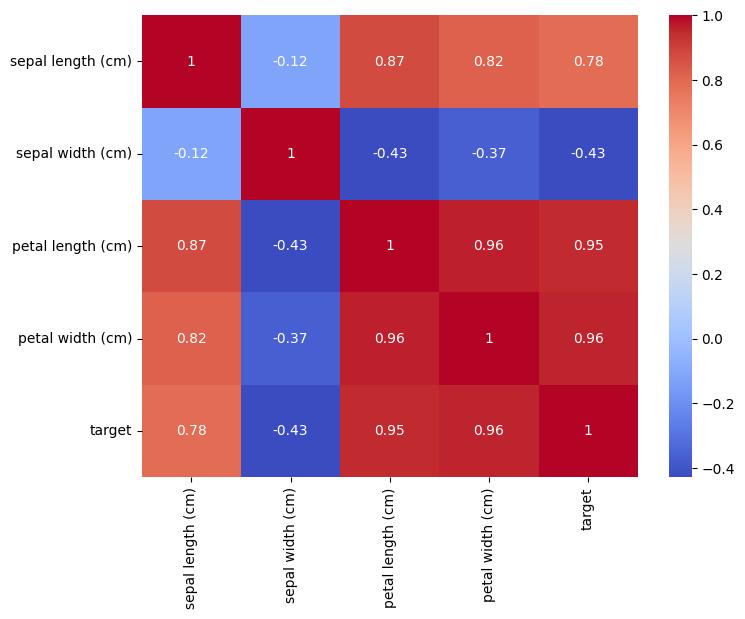

In [30]:
# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Data Preprocessing

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['target'], test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training with SVC

In [32]:
svc = SVC()

# cross-validation
# cross_val_score returns an array of scores of the estimator for each run of the cross validation.
# it not return the model actually, it just returns the score of the model
cv_scores = cross_val_score(svc, X_train, y_train, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean()}')

# Grid search for hyperparameter tuning
# GridSearchCV is a meta-estimator that performs cross-validated grid-search over a parameter grid.
# Using for finding the best hyperparameters for a model.

# I arrange parameters this way to avoid time wasting by trying all possible combinations
# specially that some parameter values are not suitable for some kernels
param_grid = [
    {'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
    {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
]


# now we will use GridSearchCV to find the best hyperparameters for the model
# refit=True means that it will refit the model with the best parameters on the whole dataset
# cv=5 means that it will use 5-fold cross-validation
grid_search = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best CV Score: {grid_search.best_score_}')

Cross-Validation Scores: [0.95238095 0.9047619  0.9047619  1.         0.95238095]
Mean CV Score: 0.9428571428571428
Best Parameters: {'C': 10, 'kernel': 'linear'}
Best CV Score: 0.9523809523809523


# Model Evaluation

In [33]:
# Predict on test data
y_pred = grid_search.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

